In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np

In [5]:
df = pd.read_excel("./Training_Data.xlsx", sheet_name="Sheet1", header=0)
df.dtypes

baseline_fhr         float64
num_accelerations      int64
num_decelerations      int64
mean_fhr             float64
median_fhr           float64
std_fhr              float64
min_fhr              float64
max_fhr              float64
range_fhr            float64
rmssd                float64
peak_frequency       float64
lf_power             float64
hf_power             float64
lf_hf_ratio          float64
approx_entropy       float64
sample_entropy       float64
dfa                  float64
variance_fhr         float64
iqr_fhr              float64
percentile_25        float64
percentile_75        float64
Label                  int64
dtype: object

In [6]:
df.shape

(185, 22)

In [7]:
df.head(10)

,baseline_fhr,num_accelerations,num_decelerations,mean_fhr,median_fhr,std_fhr,min_fhr,max_fhr,range_fhr,rmssd,...,hf_power,lf_hf_ratio,approx_entropy,sample_entropy,dfa,variance_fhr,iqr_fhr,percentile_25,percentile_75,Label
0,126.8,1,0,128.332500,127.000,7.491215,116.0,161.0,45.0,0.615101,...,33.994750,5.344125,0.214381,0.170176,1.524576,56.118309,6.000000,124.000000,130.000,0
1,150.2,0,3,138.904167,150.075,29.163626,53.0,174.0,121.0,3.337170,...,1902.811974,11.506984,0.295227,0.147677,1.442205,850.517062,32.825893,126.174107,159.000,1
2,122.0,0,0,122.499375,122.000,2.696738,114.0,130.0,16.0,0.488082,...,26.049172,3.566847,0.578234,0.402677,1.314666,7.272395,4.000000,121.000000,125.000,0
3,148.0,0,0,148.792083,148.000,4.544945,139.0,163.0,24.0,0.554041,...,18.670587,5.973390,0.664095,0.450233,1.483199,20.656521,5.000000,146.000000,151.000,0
4,126.7,0,0,126.838333,127.000,2.131634,121.0,138.0,17.0,0.519322,...,30.189750,2.278940,0.656165,0.499648,1.187665,4.543864,2.000000,126.000000,128.000,0
5,131.2,0,0,131.679167,131.000,4.360569,123.0,149.0,26.0,0.733865,...,48.628799,6.275444,0.734405,0.498191,1.387338,19.014566,4.000000,129.000000,133.000,0
6,151.0,0,1,149.489730,151.000,12.479615,126.0,174.0,48.0,1.027101,...,105.364550,6.076262,0.223500,0.163354,1.572548,155.740801,23.000000,138.000000,161.000,0
7,138.8,1,0,140.137500,139.000,6.360379,127.0,158.0,31.0,0.575663,...,20.999018,12.721288,0.216407,0.185727,1.589020,40.454427,7.000000,136.000000,143.000,0
8,139.9,0,0,140.779167,140.000,6.375861,120.0,175.0,55.0,0.813663,...,86.714556,6.457412,0.252741,0.204303,1.428158,40.651597,8.625000,136.000000,144.625,0
9,142.6,3,0,144.903333,143.000,8.085583,131.0,175.0,44.0,0.689769,...,32.754512,10.741191,0.270179,0.208169,1.576368,65.376656,7.000000,140.000000,147.000,0


In [8]:
x = df.drop("Label", axis=1)
y = df["Label"]

In [9]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.4, random_state=42, stratify=y)
display(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(111, 21)

(74, 21)

(111,)

(74,)

In [10]:
x_train.head(10)

,baseline_fhr,num_accelerations,num_decelerations,mean_fhr,median_fhr,std_fhr,min_fhr,max_fhr,range_fhr,rmssd,...,lf_power,hf_power,lf_hf_ratio,approx_entropy,sample_entropy,dfa,variance_fhr,iqr_fhr,percentile_25,percentile_75
100,119.900,4,0,123.174583,120.0,9.938139,108.0,150.0,42.0,0.979787,...,661.785921,87.572829,7.556978,0.353122,0.245709,1.525547,98.766604,11.000000,116.0,127.000000
29,149.900,0,0,150.603542,150.0,5.308528,141.0,167.0,26.0,0.642780,...,190.422827,45.330207,4.200793,0.229212,0.170464,1.501969,28.180473,6.000000,147.0,153.000000
16,139.300,0,0,140.302917,139.0,4.543254,131.0,155.0,24.0,0.540174,...,176.103431,21.047131,8.367099,0.622968,0.382179,1.474276,20.641158,4.000000,138.0,142.000000
28,142.900,0,0,143.137917,143.0,2.488252,138.0,155.0,17.0,0.486585,...,135.947071,14.099402,9.642045,0.622539,0.386171,1.298922,6.191396,2.000000,142.0,144.000000
113,142.200,0,0,144.001875,142.0,6.710842,130.0,182.0,52.0,0.818136,...,433.250179,94.948498,4.563002,0.220382,0.136990,1.455294,45.035397,5.000000,140.0,145.000000
64,133.485,0,0,135.517917,133.0,7.261758,120.0,155.0,35.0,0.705975,...,272.979179,34.815351,7.840770,0.231516,0.167642,1.604708,52.733128,7.075000,131.0,138.075000
163,135.800,3,0,140.728125,136.0,11.946203,123.0,187.0,64.0,0.869258,...,422.051494,62.373855,6.766481,0.169307,0.113697,1.605375,142.711758,11.490038,133.0,144.490038
152,129.900,2,0,131.610833,130.0,7.144010,120.0,158.0,38.0,0.639795,...,359.052306,30.624491,11.724352,0.229411,0.160596,1.570181,51.036883,5.000000,128.0,133.000000
149,129.000,0,0,128.962708,129.0,2.374422,116.0,134.0,18.0,0.501973,...,85.466898,15.668070,5.454845,0.535312,0.332650,1.225430,5.637880,3.000000,128.0,131.000000
47,147.000,0,0,147.791250,147.0,3.696756,141.0,163.0,22.0,0.378673,...,48.598109,6.393467,7.601214,0.455662,0.229206,1.591067,13.666007,4.000000,145.0,149.000000


In [11]:
y_train

100    0
29     0
16     0
28     0
113    0
      ..
66     0
60     0
54     1
46     0
161    0
Name: Label, Length: 111, dtype: int64

In [12]:
lr_pipeline = make_pipeline(
    SimpleImputer(strategy="mean"),        # or "median", "most_frequent", etc.
    StandardScaler(),                      # optional but often helpful
    LogisticRegression(max_iter=1000)
)

lr_pipeline.fit(x_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [13]:
cv_scores = cross_val_score(lr_pipeline, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores (5 folds):", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-Validation Accuracy Scores (5 folds): [0.97297297 0.97297297 0.97297297 0.97297297 0.97297297]
Mean CV Accuracy: 0.972972972972973


In [14]:
y_pred = lr_pipeline.predict(x_val)
y_prob = lr_pipeline.predict_proba(x_val)[:, 1]

In [15]:
val_acc = accuracy_score(y_val, y_pred)
val_acc

0.972972972972973

In [16]:
cm = confusion_matrix(y_val, y_pred)
cm

array([[67,  1],
       [ 1,  5]])

In [17]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        68
           1       0.83      0.83      0.83         6

    accuracy                           0.97        74
   macro avg       0.91      0.91      0.91        74
weighted avg       0.97      0.97      0.97        74



In [18]:
auc = roc_auc_score(y_val, y_prob)
auc

np.float64(0.9975490196078431)

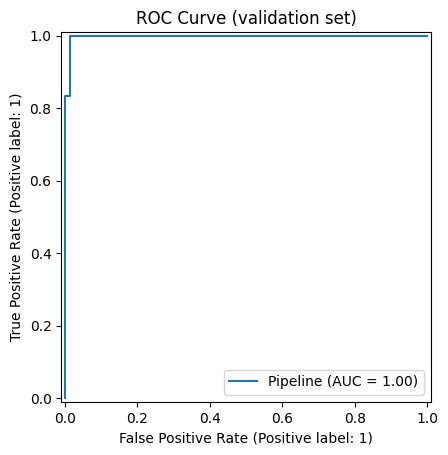

In [19]:
disp = RocCurveDisplay.from_estimator(lr_pipeline, x_val, y_val)
plt.title("ROC Curve (validation set)")
plt.show()

In [20]:
x_test_group_1 = pd.read_excel("./Test_Data.xlsx", sheet_name="Group-1", header=0)
x_test_group_2 = pd.read_excel("./Test_Data.xlsx", sheet_name="Group-2", header=0)
x_test_group_3 = pd.read_excel("./Test_Data.xlsx", sheet_name="Group-3", header=0)
x_test_group_4 = pd.read_excel("./Test_Data.xlsx", sheet_name="Group-4", header=0)

In [21]:
prediction_group_1 = lr_pipeline.predict(x_test_group_1)
pd.DataFrame(prediction_group_1).to_excel("./LR-PG1.xlsx", index=False)

In [22]:
prediction_group_2 = lr_pipeline.predict(x_test_group_2)
pd.DataFrame(prediction_group_2).to_excel("./LR-PG2.xlsx", index=False)

In [23]:
prediction_group_3 = lr_pipeline.predict(x_test_group_3)
pd.DataFrame(prediction_group_3).to_excel("./LR-PG3.xlsx", index=False)

In [24]:
prediction_group_4 = lr_pipeline.predict(x_test_group_4)
pd.DataFrame(prediction_group_4).to_excel("./LR-PG4.xlsx", index=False)